In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import scipy.misc
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.applications.densenet import DenseNet169
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Train_SIRI-WHU.h5', 'r')
    train_set_x_orig = np.array(train_dataset["X_train_dataset"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["Y_train_dataset"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Test_SIRI-WHU.h5', 'r')
    test_set_x_orig = np.array(test_dataset["X_test_dataset"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["Y_test_dataset"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (Dataset)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


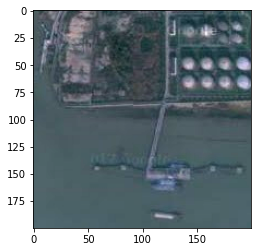

In [ ]:
#for i in range(X_train_orig.shape[0]):
#  X_train_orig[i] = Image.fromarray(X_train_orig[i].astype(np.uint8)).convert(mode='HSV')
#  X_train_orig[i] = Image.fromarray(X_train_orig[i].astype(np.uint8)).convert(mode='YCbCr')

#for j in range(X_test_orig.shape[0]):
#  X_test_orig[j] = Image.fromarray(X_test_orig[j].astype(np.uint8)).convert(mode='HSV')
#  X_test_orig[j] = Image.fromarray(X_test_orig[j].astype(np.uint8)).convert(mode='YCbCr')

index = 50
plt.imshow(array_to_img(X_train_orig[index]))
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
Desnet_Out = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Convout/TLB1000/Desnet_Out.h5', 'r')
Txtrain = np.array(Desnet_Out["train_OutDesnet"][:])
Txtest = np.array(Desnet_Out["test_OutDesnet"][:])
Desnet_Out.close()

print("Txtrain Shape:", Txtrain.shape)
print("Txtest Shape:", Txtest.shape)
print("Y_train_orig Shape:", Y_train_orig.shape)
print("Y_test_orig Shape:", Y_test_orig.shape)

Txtrain Shape: (1920, 1664)
Txtest Shape: (480, 1664)
Y_train_orig Shape: (1, 1920)
Y_test_orig Shape: (1, 480)


In [ ]:
modelSVM = SVC(C=1.7, kernel='rbf', verbose=False, decision_function_shape='ovo')
modelSVM.fit(Txtrain, Y_train_orig.T)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictionsSVMR = modelSVM.predict(Txtrain)
print('SVM Train ', accuracy_score(Y_train_orig.T, predictionsSVMR))
#print(confusion_matrix(Y_train_orig.T, predictionsSVMR))
#print(classification_report(Y_train_orig.T, predictionsSVMR))

predictionsSVMS = modelSVM.predict(Txtest)
print('SVM Test ', accuracy_score(Y_test_orig.T, predictionsSVMS))
#print(confusion_matrix(Y_test_orig.T, predictionsSVMS))
#print(classification_report(Y_test_orig.T, predictionsSVMS))

SVM Train  0.9989583333333333
SVM Test  0.9395833333333333


In [ ]:
epochs = len(Vhistory.history['loss'])
max_loss = max(max(Vhistory.history['loss']), max(Vhistory.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, Vhistory.history['loss'])
plt.plot(x, Vhistory.history['val_loss'])
plt.title('Training loss vs. Validtion loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validate'], loc='right')
plt.show()

In [ ]:
epochs = len(Vhistory.history['accuracy'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, Vhistory.history['accuracy'])
plt.plot(x, Vhistory.history['val_accuracy'])
plt.title('Training accuracy vs. Validate accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validate'], loc='right')
plt.show()